## Initial Data Exploration and Analysis

### Numerical data

In [8]:
import pandas as pd
import numpy as np

df = pd.read_csv('../dataset/Houses-dataset/dataset.csv')

df.head()

,bedrooms,bathrooms,area,zipcode,bathroom_image,bedroom_image,kitchen_image,frontal_image,price
0,4,4.0,4053,85255,1_bathroom.jpg,1_bedroom.jpg,1_kitchen.jpg,1_frontal.jpg,869500
1,4,3.0,3343,36372,2_bathroom.jpg,2_bedroom.jpg,2_kitchen.jpg,2_frontal.jpg,865200
2,3,4.0,3923,85266,3_bathroom.jpg,3_bedroom.jpg,3_kitchen.jpg,3_frontal.jpg,889000
3,5,5.0,4022,85262,4_bathroom.jpg,4_bedroom.jpg,4_kitchen.jpg,4_frontal.jpg,910000
4,3,4.0,4116,85266,5_bathroom.jpg,5_bedroom.jpg,5_kitchen.jpg,5_frontal.jpg,971226


In [2]:
print("Estadísticas Descriptivas:")

print(df.describe())

Estadísticas Descriptivas:
         bedrooms   bathrooms         area       zipcode         price
count  535.000000  535.000000   535.000000    535.000000  5.350000e+02
mean     3.377570    2.664953  2364.904673  90937.768224  5.893628e+05
std      1.160952    0.995077  1224.556982   7141.857452  5.090261e+05
min      1.000000    1.000000   701.000000  36372.000000  2.200000e+04
25%      3.000000    2.000000  1440.000000  92276.000000  2.492000e+05
50%      3.000000    2.500000  2078.000000  92880.000000  5.290000e+05
75%      4.000000    3.000000  3067.500000  93510.000000  7.285000e+05
max     10.000000    7.000000  9583.000000  98021.000000  5.858000e+06


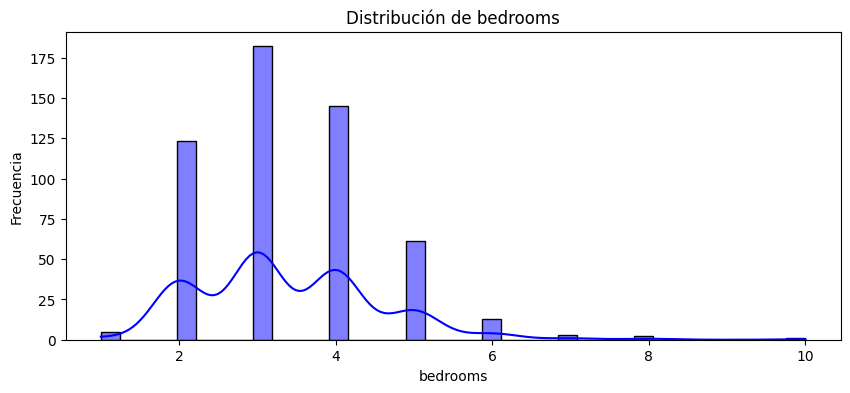

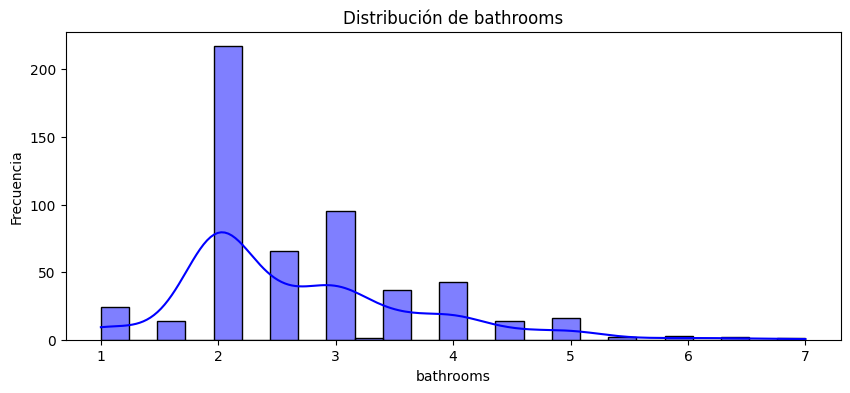

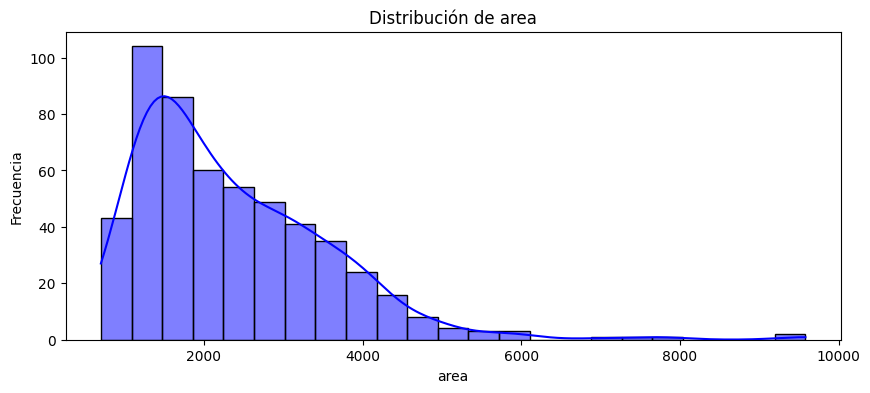

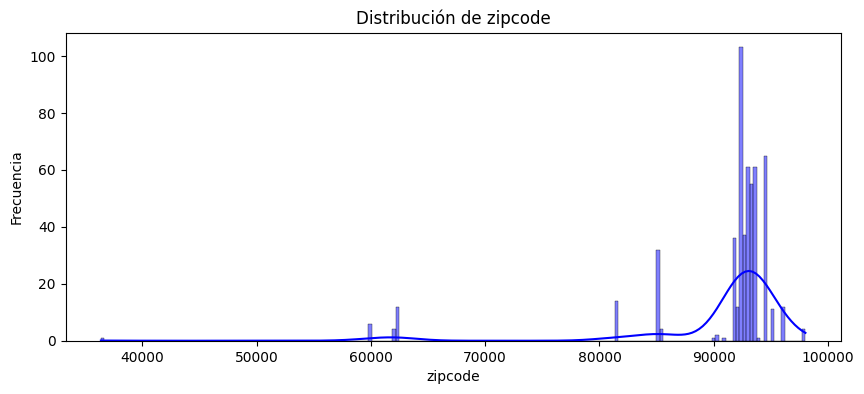

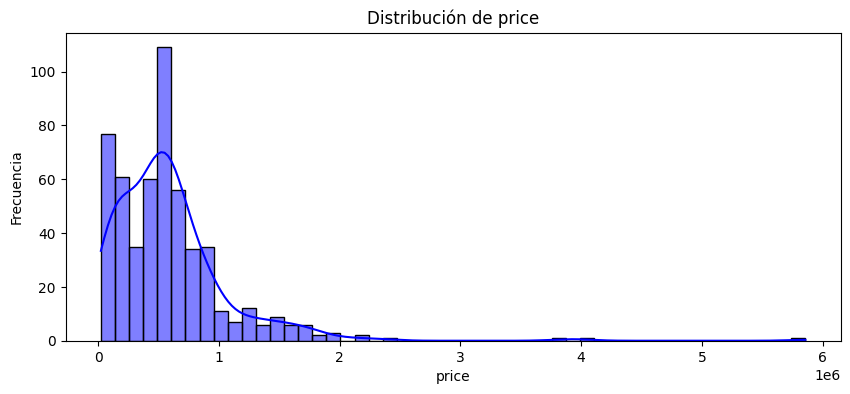

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns

variables = ['bedrooms', 'bathrooms', 'area', 'zipcode', 'price']

# Histograma y KDE para cada variable
for var in variables:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[var], kde=True, color='blue')
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()


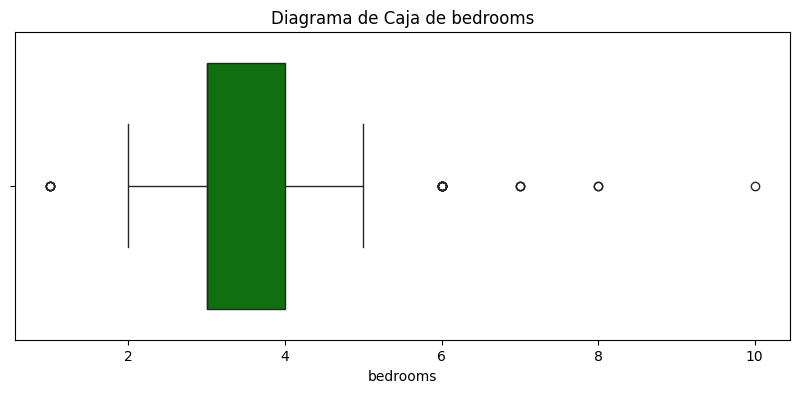

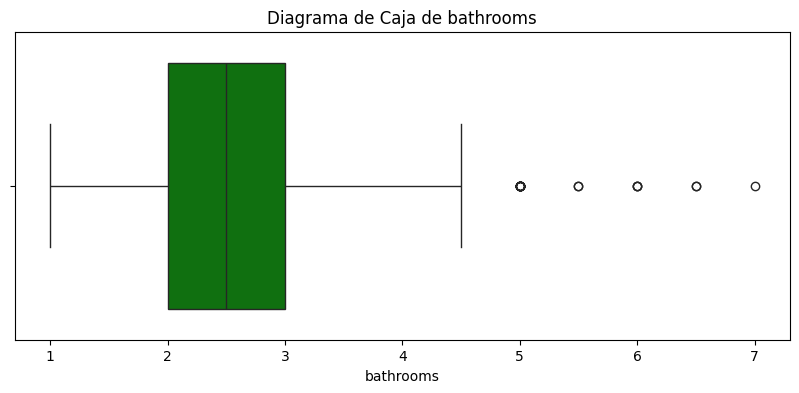

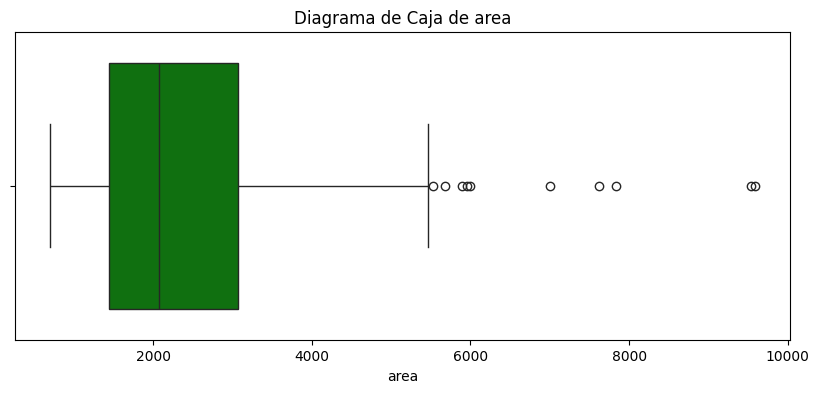

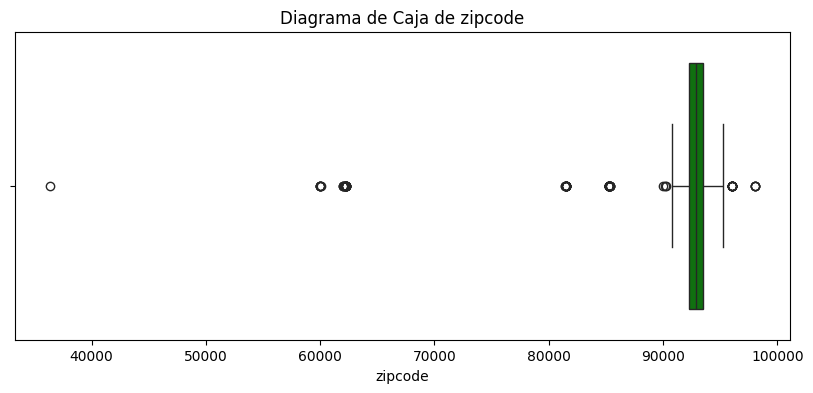

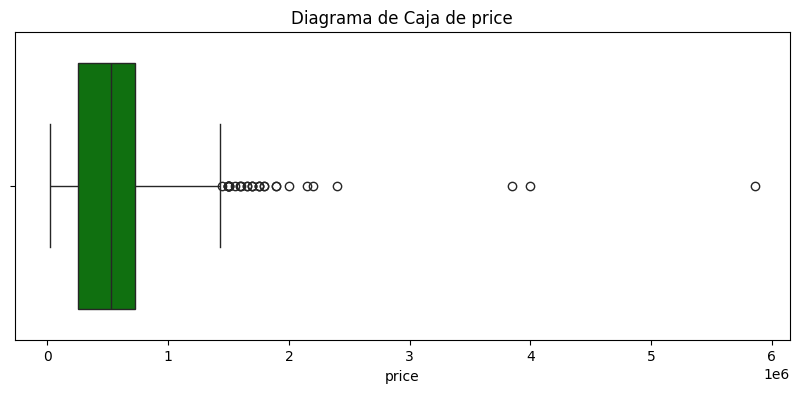

In [4]:
# Diagrama de caja para cada variable
for var in variables:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[var], color='green')
    plt.title(f'Diagrama de Caja de {var}')
    plt.xlabel(var)
    plt.show()

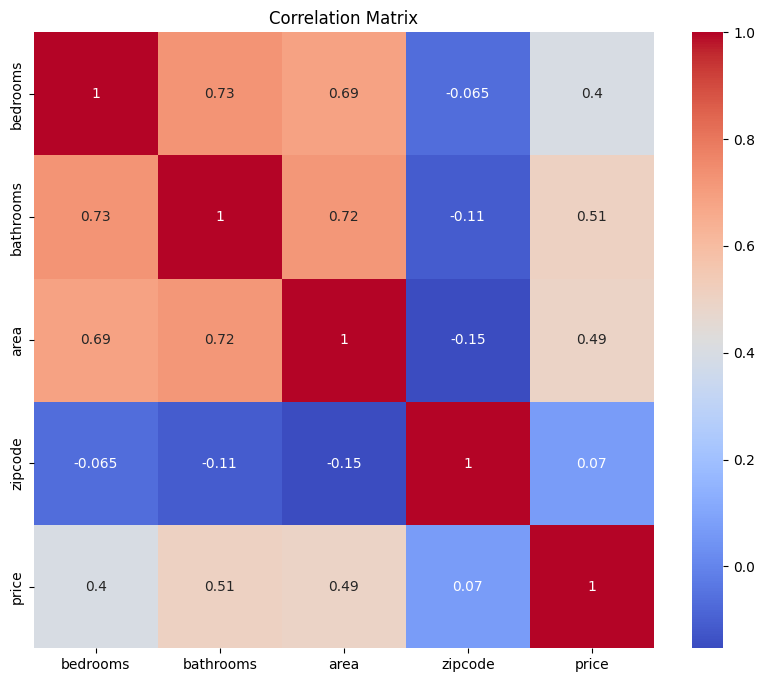

In [12]:
# Delete columns selected
df_cleaned = df.drop(columns=['bathroom_image', 'bedroom_image', 'kitchen_image', 'frontal_image'])

# Correlation matrix
corr_matrix = df_cleaned.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [15]:
print("Missing Values ​​per Column:")
print(df_cleaned.isnull().sum())

Missing Values ​​per Column:
bedrooms     0
bathrooms    0
area         0
zipcode      0
price        0
dtype: int64


In [19]:
# Identify Outliers

for var in variables:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    print(f"Outliers in {var}: {outliers.shape[0]}")


Outliers in bedrooms: 24
Outliers in bathrooms: 24
Outliers in area: 10
Outliers in zipcode: 92
Outliers in price: 31


### Images

In [26]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Base directory
base_image_dir = '../dataset/Houses-dataset/Houses Dataset'

# Types of images
image_types = ['bathroom_image', 'bedroom_image	', 'kitchen_image', 'frontal_image']


In [24]:
def check_image_properties(image_dir):
    resolutions = []
    formats = []
    for img_name in os.listdir(image_dir):
        img_path = os.path.join(image_dir, img_name)
        try:
            with Image.open(img_path) as img:
                resolutions.append(img.size)
                formats.append(img.format)
        except Exception as e:
            print(f"Error al abrir {img_name}: {e}")
    return resolutions, formats


In [27]:
for img_type in image_types:
    print(f"\nAnálisis de imágenes de {img_type}:")
    img_dir = os.path.join(base_image_dir, img_type)
    resolutions, formats = check_image_properties(img_dir)
    # Mostrar información
    res_df = pd.DataFrame(resolutions, columns=['Ancho', 'Alto'])
    print("Resoluciones:")
    print(res_df.describe())
    format_counts = pd.Series(formats).value_counts()
    print("Formatos:")
    print(format_counts)



Análisis de imágenes de bathroom_image:


FileNotFoundError: [WinError 3] El sistema no puede encontrar la ruta especificada: '../dataset/Houses-dataset/Houses Dataset\\bathroom_image'